<a href="https://colab.research.google.com/github/juanmadeira/pytorch/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01. [PyTorch Workflow](https://www.learnpytorch.io/01_pytorch_workflow/)

In [347]:
workflow = {1: "data (prepare and load)",
            2: "build model",
            3: "fitting the model to data (training)",
            4: "making predictions and evaluating a model (inference)",
            5: "saving  and loading a model",
            6: "putting it all together"}

In [348]:
import torch
from torch import nn # contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt
import numpy as np

torch.__version__

'2.8.0+cu126'

# 1. Data (preparing and loading)
* Excel spreadsheet
* Images
* Videos
* Audios
* DNA
* Text

1.1. Get data into numerical representation\
1.2. Build a model to learn patterns in that numerical representation

> Linear Regression Formula
```
y = a + bx
```
y = dependent variable\
a = intercept (value of y when x = 0)\
x = explanatory (independent) variable

In [349]:
weight = 0.7 # b
bias = 0.3 # a

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1) # capital X typically is a matrix or a tensor (if lowercase represents a vector)
y = weight * X + bias

print(f"{X[:10]},\n\n{y[:10]}")
print(f"\nlen(X): {len(X)}, len(y): {len(y)}")

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]]),

tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])

len(X): 50, len(y): 50


## Splitting data into training and test sets

In [350]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

print(len(X_train), len(y_train), len(X_test), len(y_test))
print(f"\n{X_train}\n\n{y_train}")

40 40 10 10

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800],
        [0.2000],
        [0.2200],
        [0.2400],
        [0.2600],
        [0.2800],
        [0.3000],
        [0.3200],
        [0.3400],
        [0.3600],
        [0.3800],
        [0.4000],
        [0.4200],
        [0.4400],
        [0.4600],
        [0.4800],
        [0.5000],
        [0.5200],
        [0.5400],
        [0.5600],
        [0.5800],
        [0.6000],
        [0.6200],
        [0.6400],
        [0.6600],
        [0.6800],
        [0.7000],
        [0.7200],
        [0.7400],
        [0.7600],
        [0.7800]])

tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260],
        [0.4400],
        [0.4540],
        [0.4680],
        [0.4820],
        [0.49

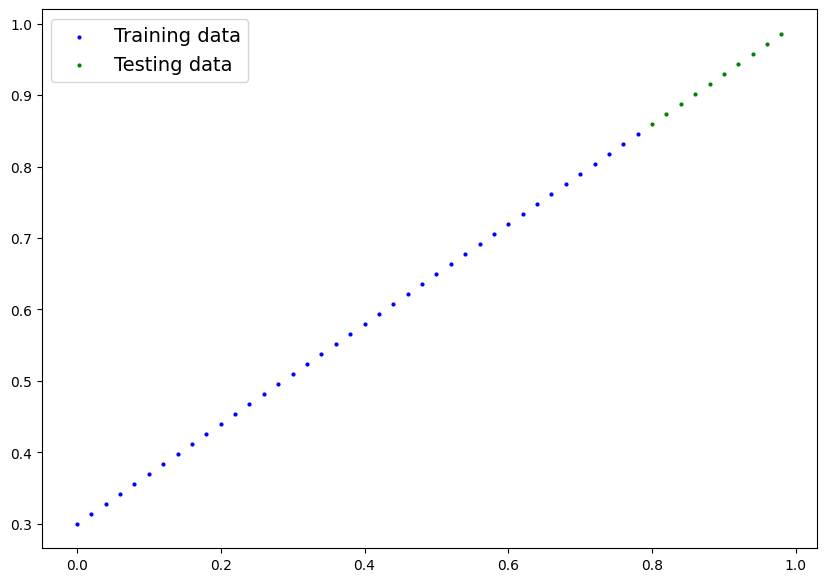

In [351]:
# how might we better visualize our data?
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):

    plt.figure(figsize=(10, 7)) # plots training data, test data and compares predictions
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data") # plot training data in blue
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data") # plot training data in green

    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions") # plot predictions in red (if they exist)

    plt.legend(prop={"size": 14}) # show the legend

plot_predictions()

# 2. Build a model
To learn about [OOP in Python](https://realpython.com/python3-object-oriented-programming/).

What our model does:
* Start with random values
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias values we used to create data)

How does it do so?
1. [Gradient descent](https://youtu.be/IHZwWFHWa-w)
2. [Backpropagation](https://youtu.be/Ilg3gGewQ5U)

In [352]:
# create linear regression model class
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1,
                                                requires_grad=True,
                                                dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                                requires_grad=True,
                                                dtype=torch.float))

    def forward(self, x: torch.Tensor) -> torch.Tensor: # x is the input data
        return self.weight * x + self.bias # linear regression formula

## Model building essentials
- `torch.nn` Contains all of the building blocks for computational graphs (a neural network can be considered a computational graph)

- `torch.nn.Parameter` What parameters should our model try and learn, oftean a PyTorch layer from torch.nn will set these for us

- `torch.nn.Module` The base class for all neural network modules, if you subclass it, you should overwrite forward()

- `torch.optim` Where the optimizers in PyTorch live, they will help with gradient descent

- `def forward()` All nn.Module subclasses require a forward() method, this defines the computation that will take place on the data passed to the particular nn.Module (e.g. the linear regression formula above)

## Checking contents of a PyTorch model

`.parameters()`



In [353]:
# create a random seed
torch.manual_seed(42)

# create an instance of the model
model_0 = LinearRegressionModel()

# check the parameters
print(model_0, "\n")
print(model_0.parameters(), "\n")
print(list(model_0.parameters()))

LinearRegressionModel() 

<generator object Module.parameters at 0x7cc61b07fbc0> 

[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]


In [354]:
# list named parameters
print(model_0.state_dict(), "\n")
print(weight, bias)

OrderedDict({'weight': tensor([0.3367]), 'bias': tensor([0.1288])}) 

0.7 0.3


We would like our parameters to be as close as possible to the predefined ones...

so...
## Making predictions using `torch.inference_mode()`

In [355]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [356]:
with torch.inference_mode():
    y_preds = model_0(X_test)

# also can be done similar with torch.no_grad() but torch.inference_mode() is preferred
# with torch.no_grad():
#     y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

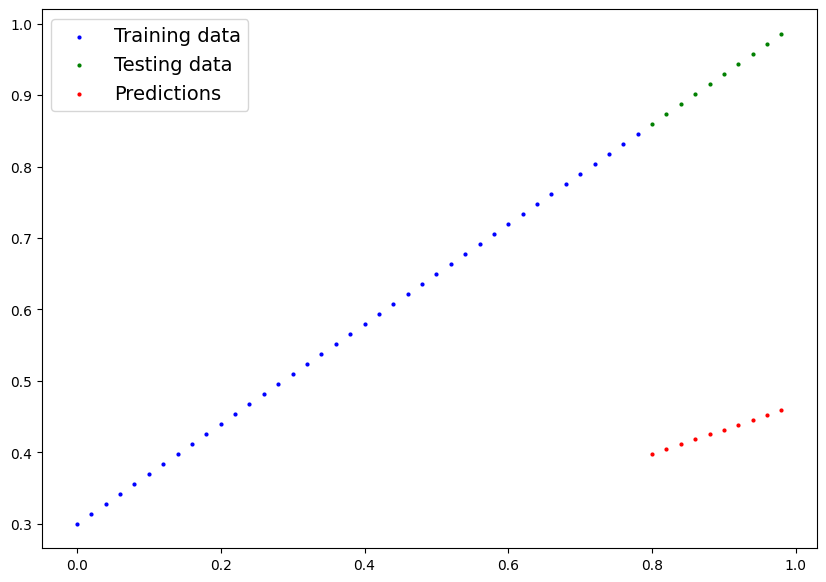

In [357]:
plot_predictions(predictions=y_preds)

# 3. Train a model
Move from some unknown parameters (may be random) to some known parameters. In other words, poor representation of the data to a better representation

One way to measure how poor or how wrong a model predictions are is to use a **loss function** (a. k. a. cost function or criterion in different areas),lower is better

In [358]:
list(model_0.parameters())
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [359]:
# setup a loss function
loss_fn = nn.L1Loss() # MAE_loss is same as L1Loss

# setup an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) # learning rate (the most important hyperparameter)

## Building training and testing loops
0. Loop through the data
1. Forward pass to make predictions on data - also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**backpropagation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)

In [360]:
# and epoch is one loop through the data
epochs = 200

# track different values
epoch_count = []
loss_values = []
test_loss_values = []

## Training
# 0. Loop through the data
for epoch in range(epochs):
    # set the model to training mode
    model_0.train() # sets all parameters that require gradients to require gradients

    # 1. Forward pass
    y_pred = model_0(X_train)

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward (perform backpropagation)
    loss.backward()

    # 5. Optimizer step (perform gradient descent)
    optimizer.step()

    ## Testing
    model_0.eval() # turns off different settings in the model not needed for evaluation/testing
    with torch.inference_mode(): # turns off gradient tracking
        # 1. Do the forward pass
        test_pred = model_0(X_test)

        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)

        print(f"Epoch: {epoch}")
        print(f"Loss: {loss}")
        print(f"Test loss: {test_loss}")
        print(model_0.state_dict(),"\n")

Epoch: 0
Loss: 0.31288138031959534
Test loss: 0.48106518387794495
OrderedDict({'weight': tensor([0.3406]), 'bias': tensor([0.1388])}) 

Epoch: 10
Loss: 0.1976713240146637
Test loss: 0.3463551998138428
OrderedDict({'weight': tensor([0.3796]), 'bias': tensor([0.2388])}) 

Epoch: 20
Loss: 0.08908725529909134
Test loss: 0.21729660034179688
OrderedDict({'weight': tensor([0.4184]), 'bias': tensor([0.3333])}) 

Epoch: 30
Loss: 0.053148526698350906
Test loss: 0.14464017748832703
OrderedDict({'weight': tensor([0.4512]), 'bias': tensor([0.3768])}) 

Epoch: 40
Loss: 0.04543796554207802
Test loss: 0.11360953003168106
OrderedDict({'weight': tensor([0.4748]), 'bias': tensor([0.3868])}) 

Epoch: 50
Loss: 0.04167863354086876
Test loss: 0.09919948130846024
OrderedDict({'weight': tensor([0.4938]), 'bias': tensor([0.3843])}) 

Epoch: 60
Loss: 0.03818932920694351
Test loss: 0.08886633068323135
OrderedDict({'weight': tensor([0.5116]), 'bias': tensor([0.3788])}) 

Epoch: 70
Loss: 0.03476089984178543
Test lo

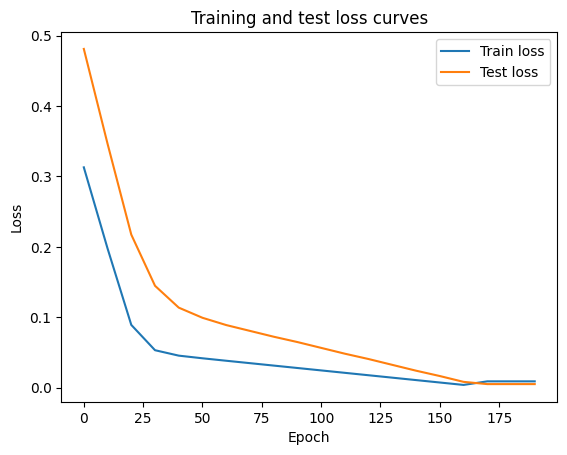

In [361]:
# plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend();

# 4. Making predictions with a trained model

In [362]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)

In [363]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [364]:
weight, bias

(0.7, 0.3)

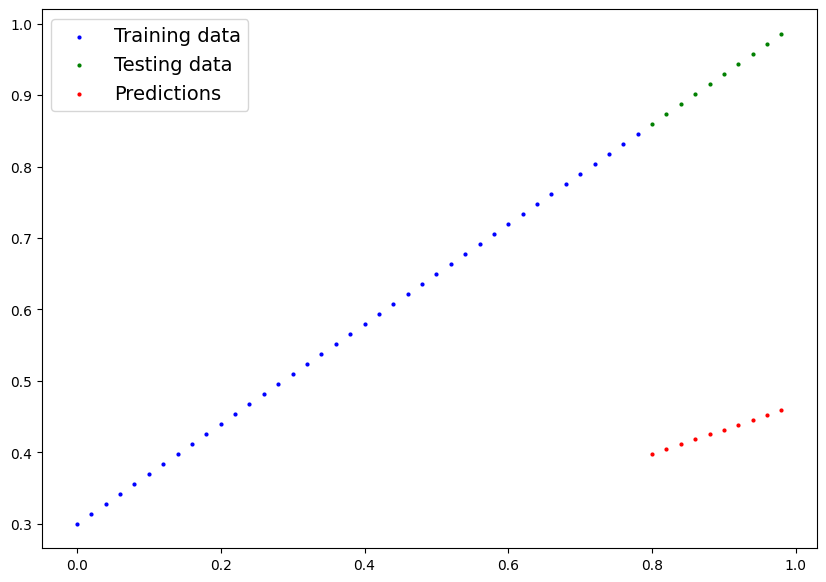

In [365]:
plot_predictions(predictions=y_preds)

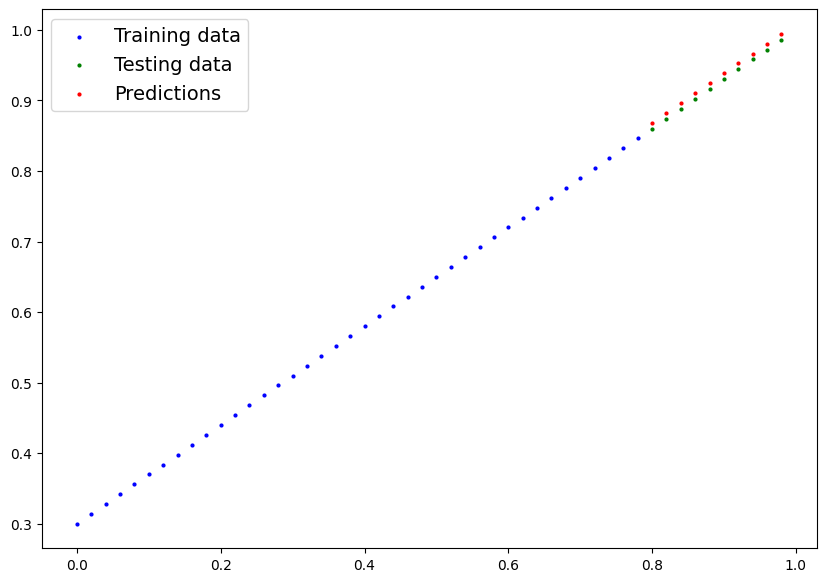

In [366]:
plot_predictions(predictions=y_preds_new)

# 5. Saving a model
- `torch.save()` - save the object in Python's pickle format
- `torch.load()` - load a saved object
- `toch.nn.Module.load_state_dict()` - load a model's saved state dictionary

In [367]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [368]:
!ls -l models

total 8
-rw-r--r-- 1 root root 2117 Oct  7 21:57 01_pytorch_workflow_model_0.pth
-rw-r--r-- 1 root root 2181 Oct  7 21:56 01_pytorch_workflow_model_1.pth


In [369]:
# loading a model
loaded_model_0 = LinearRegressionModel()
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [370]:
# make some predictions with loaded model
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [371]:
# make some predictions with original model
model_0.eval()
with torch.inference_mode():
    y_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [372]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# 6. Putting it all together


In [373]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.8.0+cu126'

In [374]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


## Data

In [375]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [376]:
# split the data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [377]:
# how might we better visualize our data?
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):

    plt.figure(figsize=(10, 7)) # plots training data, test data and compares predictions
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data") # plot training data in blue
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data") # plot training data in green

    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions") # plot predictions in red (if they exist)

    plt.legend(prop={"size": 14}) # show the legend

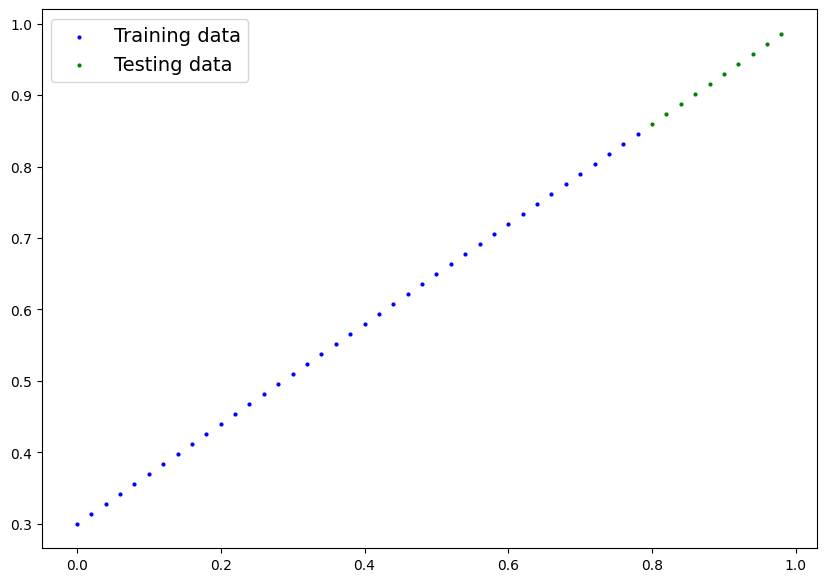

In [378]:
# plot the data
plot_predictions(X_train, y_train, X_test, y_test)

## Building a Linear model

In [379]:
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1)
        # use nn.Linear() for creating the model parameters
        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1)
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[-0.2343]])),
              ('linear_layer.bias', tensor([0.9186]))]))

In [380]:
next(model_1.parameters()).device

device(type='cpu')

In [381]:
# set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

## Training
- Loss function
- Optimizer
- Training loop
- Testing loop

In [382]:
# setup loss function
loss_fn = nn.L1Loss()

# setup optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

In [395]:
torch.manual_seed(42)
epochs = 200

# put data on the target device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

## Training
for epoch in range(epochs):
    model_1.train()

    # 1. Forward pass
    y_pred = model_1(X_train)

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Performs backpropagation
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ## Testing
    model_1.eval()
    with torch.inference_mode():
        test_pred = model_1(X_test)
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Loss: 0.06856837123632431 | Test loss: 0.15943877398967743
Epoch: 10 | Loss: 0.06513068079948425 | Test loss: 0.15185311436653137
Epoch: 20 | Loss: 0.061702240258455276 | Test loss: 0.1435805857181549
Epoch: 30 | Loss: 0.058264754712581635 | Test loss: 0.13530804216861725
Epoch: 40 | Loss: 0.054828744381666183 | Test loss: 0.1277223527431488
Epoch: 50 | Loss: 0.05139993876218796 | Test loss: 0.11944983154535294
Epoch: 60 | Loss: 0.04796113446354866 | Test loss: 0.11117730289697647
Epoch: 70 | Loss: 0.04452681168913841 | Test loss: 0.10359163582324982
Epoch: 80 | Loss: 0.04109632223844528 | Test loss: 0.09531907737255096
Epoch: 90 | Loss: 0.037657514214515686 | Test loss: 0.0870465412735939
Epoch: 100 | Loss: 0.03422488644719124 | Test loss: 0.07946088165044785
Epoch: 110 | Loss: 0.030792707577347755 | Test loss: 0.07118834555149078
Epoch: 120 | Loss: 0.027353893965482712 | Test loss: 0.06291580945253372
Epoch: 130 | Loss: 0.02392295002937317 | Test loss: 0.055330146104097366

In [384]:
model_1.state_dict()
weight, bias

(0.7, 0.3)

## Making and evaluating predictions

In [396]:
# turn model into evaluation mode
model_1.eval()

# make predictions on the test data
with torch.inference_mode():
    y_preds = model_1(X_test)

y_preds

tensor([[0.8679],
        [0.8819],
        [0.8959],
        [0.9098],
        [0.9238],
        [0.9378],
        [0.9517],
        [0.9657],
        [0.9797],
        [0.9937]])

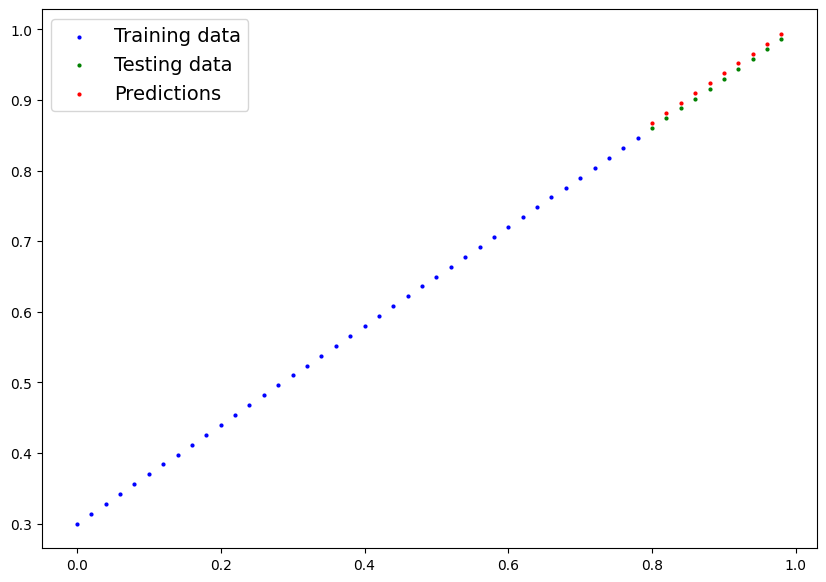

In [397]:
plot_predictions(predictions=y_preds.cpu())

## Saving and loading a trained model

In [387]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_1.pth


In [388]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.0171]])),
             ('linear_layer.bias', tensor([0.5866]))])

In [389]:
loaded_model_1 = LinearRegressionModelV2()
loaded_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [390]:
next(loaded_model_1.parameters()).device

device(type='cpu')

In [391]:
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)

y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])